# Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data Processing
---

### Reading Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


### Visualising Data

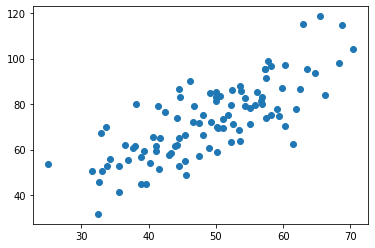

In [4]:
plt.scatter(x = 'X', y = 'Y', data=data)

### Preparing data

In [5]:
train = data[:90]
test = data[90:-1]

In [6]:
train.shape

(90, 2)

In [7]:
m = train.X.values.size
x = np.append(np.ones((m,1)), train.X.values.reshape(m, 1), axis = 1)
y = train.Y.values.reshape(m, 1)

In [8]:
n = test.X.values.size
x_t = np.append(np.ones((n, 1)), test.X.values.reshape(n, 1), axis =1)
y_t = test.Y.values.reshape(n, 1)

In [9]:
print("Train data dimensions:  X: ", x.shape, "Y: ", y.shape)
print("Test data dimensions: X: ", x_t.shape, "Y: ", y_t.shape)

Train data dimensions:  X:  (90, 2) Y:  (90, 1)
Test data dimensions: X:  (9, 2) Y:  (9, 1)


In [10]:
theta = np.ones((2,1))
theta

array([[1.],
       [1.]])

# ML model
---

### Hypothesis

<center>$h_\theta(x) = \theta.x$

### Cost function

<center>C = $\frac{1}{2}$m $\sum_{i=1}^{m} (h_\theta(x)^i - y^i)$

In [11]:
def cost(x, y, theta):
    y_pred = np.dot(x, theta)
    error = (y_pred - y)**2
    cost_val = (1/(2*m)) * (np.sum(error))
    return cost_val

In [12]:
cost(x, y, theta)

297.27960664292306

### Gradient Descent
---

<center>$\theta_j = \theta_j - \frac{1}{m}\eta\sum_{i=1}^{m} (h_\theta(x)^i - y^i).x^i$

In [13]:
def grad_des(x, y, theta, eta, epoch):
    costs = []
    for i in range(epoch):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        all_but_theta =(eta/m) * (np.sum(np.dot((np.transpose(x)), error)))
        theta -= all_but_theta
        costs.append(cost(x,y,theta))
    return costs, theta

### Storing cost and theta values

In [14]:
costs, theta = grad_des(x, y, theta, 0.0003, 1000)

### Plotting Costs

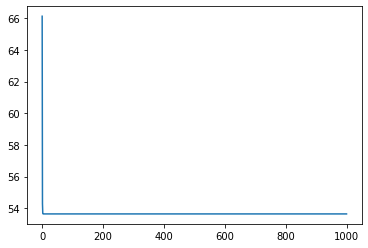

In [15]:
plt.plot(costs)

In [16]:
min(costs)

53.646029976779346

# Plotting best fit line
---

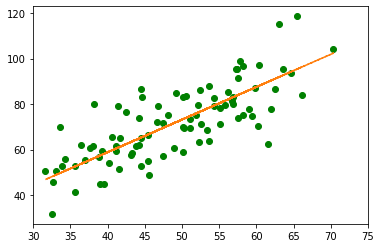

In [17]:
plt.scatter(x = 'X', y = 'Y', data=train, color = 'green')
x_vals = x
y_vals = np.dot(x_vals, theta)
plt.xlim((30, 75))
plt.plot(x_vals, y_vals, '--')

# Evaluating our model
---

In [18]:
costs_t, theta_t = grad_des(x_t, y_t, theta, 0.0003, 1000)

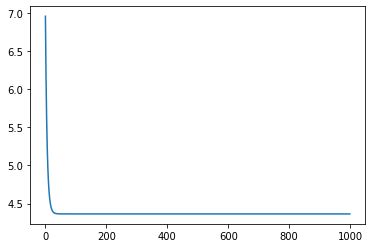

In [19]:
plt.plot(costs_t)

In [20]:
min(costs_t)

4.364662957652093

# Evaluating user input values
---

In [ ]:
print("How many Y values do you want to predict?")
j = int(input())
for i in range(j):    
    print("Enter X value:")
    var = int(input())
    ans = theta[0, 0] + theta[1,0]*var
    print("The predcited Y value is: ", ans)

How many Y values do you want to predict?
